# Building a Computer Vision Model

> The summary of "Fundamental of tinyML" from Harvard University.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

plt.rcParams['figure.figsize'] = (16, 10)

In [3]:
print('Tensorflow: v' + tf.__version__)

Tensorflow: v2.3.1


## Horse or Human small dataset

> I manually download it from [here](https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip) and extract in following directory, `./dataset/horse-or-human/`, `./dataset/validation-horse-or-human`

In [18]:
import os

# Directory with our training horse pictures
train_horse_dir = os.path.join('dataset/horse-or-human/horses')
# Directory with our training human pictures
train_human_dir = os.path.join('dataset/horse-or-human/humans')
# Directory with our training horse pictures
validation_horse_dir = os.path.join('dataset/validation-horse-or-human/horses')
# Directory with our training human pictures
validation_human_dir = os.path.join('dataset/validation-horse-or-human/humans')
train_horse_names = os.listdir('dataset/horse-or-human/horses')
print(train_horse_names[:10])
train_human_names = os.listdir('dataset/horse-or-human/humans')
print(train_human_names[:10])
validation_horse_names = os.listdir('dataset/validation-horse-or-human/horses')
print(validation_horse_names[:10])
validation_human_names = os.listdir('dataset/validation-horse-or-human/humans')
print(validation_human_names[:10])

['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png']
['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png']


### Define your model and optimizer

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [9]:
optimizer = tf.keras.optimizers.RMSprop(lr=0.001)
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

### Organize your data into Generators

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dategen = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_dategen.flow_from_directory(
    'dataset/horse-or-human',
    target_size=(300, 300),
    batch_size=128,
    class_mode='binary'
)

validation_datagen = ImageDataGenerator(rescale=1/255.)

validation_generator = validation_datagen.flow_from_directory(
    'dataset/validation-horse-or-human',
    target_size=(300, 300),
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 1027 images belonging to 2 classes.


### Train your model

This may take a little while. Remember we are now building and training relatively complex computer vision models!

In [11]:
history = model.fit(train_generator,
                    steps_per_epoch=8,
                    epochs=15,
                    validation_data=validation_generator,
                    verbose=1)

Epoch 1/15
8/8 [==============================] - 15s 2s/step - loss: 1.0243 - accuracy: 0.5250 - val_loss: 0.6201 - val_accuracy: 0.7011
Epoch 2/15
8/8 [==============================] - 17s 2s/step - loss: 0.6545 - accuracy: 0.6296 - val_loss: 1.1972 - val_accuracy: 0.5131
Epoch 3/15
8/8 [==============================] - 19s 2s/step - loss: 0.6150 - accuracy: 0.6385 - val_loss: 0.5955 - val_accuracy: 0.6164
Epoch 4/15
8/8 [==============================] - 17s 2s/step - loss: 0.6212 - accuracy: 0.6485 - val_loss: 0.4541 - val_accuracy: 0.7537
Epoch 5/15
8/8 [==============================] - 17s 2s/step - loss: 0.5866 - accuracy: 0.6930 - val_loss: 0.4160 - val_accuracy: 0.7907
Epoch 6/15
8/8 [==============================] - 17s 2s/step - loss: 0.7708 - accuracy: 0.7019 - val_loss: 0.9220 - val_accuracy: 0.7556
Epoch 7/15
8/8 [==============================] - 17s 2s/step - loss: 0.6075 - accuracy: 0.7531 - val_loss: 0.4160 - val_accuracy: 0.8072
Epoch 8/15
8/8 [==================

### Run your model

Let's now take a look at actually running a prediction using the model. This code will allow you to choose 1 or more files from your file system, it will then upload them, and run them through the model, giving an indication of whether the object is a horse or a human. **Was the model correct? Try a couple more images and see if you can confuse it!**

In [20]:
from tensorflow.keras.preprocessing import image

path = validation_human_dir + '/' + validation_human_names[10]

img = image.load_img(path, target_size=(300, 300))
x = image.img_to_array(img)
x = tf.expand_dims(x, axis=0)

image_tensor = np.vstack([x])
classes = model.predict(image_tensor)

print(classes)
print(classes[0])

if classes[0] > 0.5:
    print('human')
else:
    print('horse')

[[1.]]
[1.]
human


### Finally, let's visualize all of the model layers!

C:\Users\kcsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


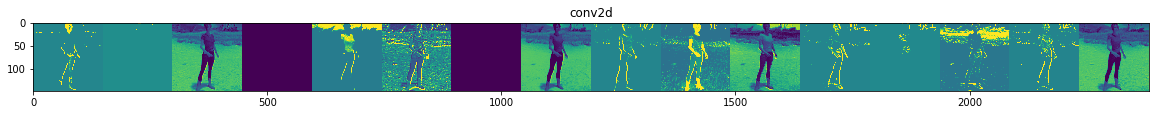

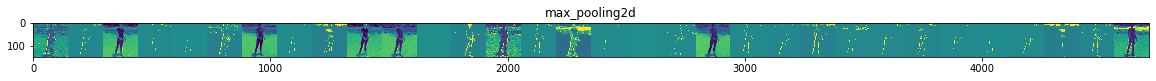

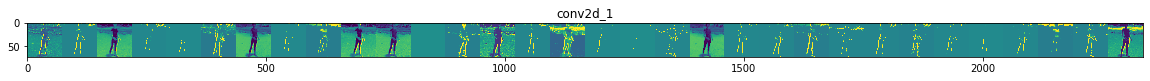

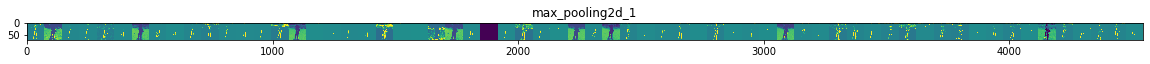

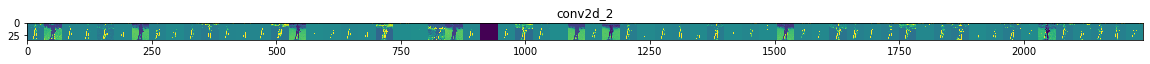

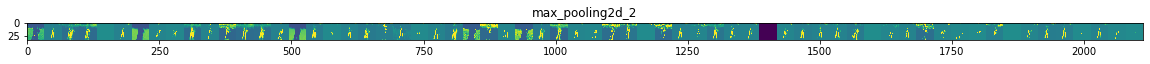

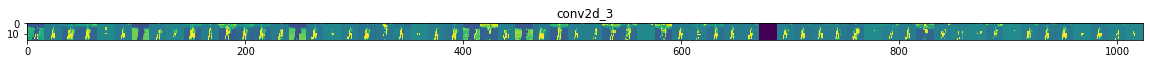

In [25]:
from tensorflow.keras.models import Model
import random

successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = image.load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = image.img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        # Just do this for the conv / maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1]  # number of features in feature map
        # The feature map has shape (1, size, size, n_features)
        size = feature_map.shape[1]
        # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            # Postprocess the feature to make it visually palatable
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            # We'll tile each filter into this big horizontal grid
            display_grid[:, i * size : (i + 1) * size] = x
        # Display the grid
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

## Tensorflow Datasets

A common way to flow data into your network for training is TensorFlow Datasets.

The goal behind TensorFlow Datasets (TFDS) is to expose datasets in a way that’s easy to consume, where all the preprocessing steps of acquiring the data and getting it into TensorFlow-friendly APIs is done for you.

You’ve already seen a little of this idea with how Keras handled Fashion MNIST.

As a recap, all you had to do to get the data was this:

```python
data = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = data.load_data()
```

TensorFlow Datasets builds on this idea, but greatly expands not only the number of datasets available but the diversity of dataset types. The list of available datasets is growing all the time including pictures, text, audio, video and more. Check out the [link](https://www.tensorflow.org/datasets/catalog/overview) to see some of the datasets.

TensorFlow Datasets is a separate install from TensorFlow, so be sure to install it before trying out any samples! If you are using Google Colab, it’s already preinstalled.

If you need to install it, you can do so with a pip command:

```
pip install tensorflow-datasets
```

Once it’s installed, you can use it to get access to a dataset with tfds.load , passing it the name of the desired dataset. For example, if you want to use Fashion MNIST, you can use code like this:

```python
import tensorflow as tf

import tensorflow_datasets as tfds

mnist_data = tfds.load("fashion_mnist")

for item in mnist_data:
    print(item)
```

Two very important concepts to learn with TensorFlow Datasets are the Splits API -- that gives you a flexible way of splitting up data into Training, Testing, Validation sets, and Mapping Functions, which allow you to do things like Augmentation. So, for example, you saw how to do Image Augmentation on a generator, but if you’re no longer using generators you’ll need an alternative! TFDS makes it simple with the mapping functions.

Here’s code as an example:
```python
def augmentimages(image, label):
    image = tf.cast(image, tf.float32)
    image = (image/255)
    image = tf.image.random_flip_left_right(image)
    return image, label

data = tfds.load('horses_or_humans', split='train', as_supervised=True)
train = data.map(augmentimages)
```

In this case, tfds.load is used to get the horses or humans dataset. It’s pre-split into a ‘train’ subset with the training data, so you can request that. Then, once you have data, you can call it’s `map` method, passing it a function like `AugmentImages` as shown, and from within there you can do your image augmentation.

There’s a lot to learn with TFDS, and it’s a really powerful API. Visit: https://www.tensorflow.org/datasets to go deeper!

## Dropout Regularization

You’ve been exploring *overfitting*, where a network may become too specialized in a particular type of input data and fare poorly on others. One technique to help overcome this is use of dropout regularization

When a neural network is being trained, each individual neuron will have an effect on neurons in subsequent layers. Over time, particularly in larger networks, some neurons can become overspecialized—and that feeds downstream, potentially causing the network as a whole to become overspecialized and leading to overfitting. Additionally, neighboring neurons can end up with similar weights and biases, and if not monitored this can lead the overall model to become overspecialized to the features activated by those neurons.

For example, consider this neural network, where there are layers of 2, 5, 5, and 2 neurons. The neurons in the middle layers might end up with very similar weights and biases.

![2.2.1_31](image/2.2.1_31.jpg)

While training, if you remove a random number of neurons and connections, and ignore them, their contribution to the neurons in the next layer are temporarily blocked

![2.2.1_32](image/2.2.1_32.jpg)

This reduces the chances of the neurons becoming overspecialized. The network will still learn the same number of parameters, but it should be better at generalization—that is, it should be more resilient to different inputs.

The concept of dropouts was proposed by Nitish Srivastava et al. in their 2014 paper “[Dropout: A Simple Way to Prevent Neural Networks from Overfitting](https://jmlr.csail.mit.edu/papers/volume15/srivastava14a/srivastava14a.pdf)”.

To implement dropouts in TensorFlow, you can just use a simple Keras layer like this:

```python
tf.keras.layers.Dropout(0.2),
```

This will drop out at random the specified percentage of neurons (here, 20%) in the specified layer. Note that it may take some experimentation to find the correct percentage for your network.

For a simple example that demonstrates this, consider the Fashion MNIST classifier you explored earlier.

If you change the network definition to have a lot more layers, like this:

```python
model = tf.keras.models.Sequential([
                     tf.keras.layers.Flatten(input_shape=(28,28)),
                     tf.keras.layers.Dense(256, activation=tf.nn.relu),
                     tf.keras.layers.Dense(128, activation=tf.nn.relu),
                     tf.keras.layers.Dense(64, activation=tf.nn.relu),
                     tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
```

Training this for 20 epochs gave around 94% accuracy on the training set, and about 88.5% on the validation set. This is a sign of potential overfitting.

Introducing dropouts after each dense layer looks like this:
```python
model = tf.keras.models.Sequential([
                  tf.keras.layers.Flatten(input_shape=(28,28)),
                  tf.keras.layers.Dense(256, activation=tf.nn.relu),
                  tf.keras.layers.Dropout(0.2),
                  tf.keras.layers.Dense(128, activation=tf.nn.relu),
                  tf.keras.layers.Dropout(0.2),
                  tf.keras.layers.Dense(64, activation=tf.nn.relu),
                  tf.keras.layers.Dropout(0.2),
                  tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
```

When this network was trained for the same period on the same data, the accuracy on the training set dropped to about 89.5%. The accuracy on the validation set stayed about the same, at 88.3%. These values are much closer to each other; the introduction of dropouts thus not only demonstrated that overfitting was occurring, but also that adding them can help remove it by ensuring that the network isn’t overspecializing to the training data.

Keep in mind as you design your neural networks that great results on your training set are not always a good thing. This could be a sign of overfitting. Introducing dropouts can help you remove that problem, so that you can optimize your network in other areas without that false sense of security!

## Exploring Loss Functions and Optimizers

To this point, you’ve been largely guided through different loss functions and optimizers that you can use when training a network.

It’s good to explore them for yourself, as well as understanding how to declare them in TensorFlow, particularly those that can accept parameters!

Note that there are generally 2 ways that you can declare these functions -- by name, in a string literal, or by object, by defining the class name of the function you want to use.

Here’s an example of doing it by name:

```python
optimizer = 'adam'
```

And one of doing it using the functional syntax

```python
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=0.001)

optimizer = opt
```

Using the former method is obviously quicker and easier, and you don’t need any imports, which can be easy to forget, in particular if you’re copying and pasting code from elsewhere! Using the latter has the distinct advantage of letting you set internal hyperparameters, such as the learning rate, giving you more fine-grained control over how your network learns.

You can learn more about the suite of **optimizers** in TensorFlow at [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) to this point you’ve seen SGD, RMSProp and Adam, and I’d recommend you read up on what they do. After that, consider reading into some of the others, in particular the enhancements to the Adam algorithm that are available.

Similarly you can learn about the **loss functions** in TensorFlow at [here](https://www.tensorflow.org/api_docs/python/tf/keras/losses) and to this point you’ve seen Mean Squared Error, Binary CrossEntropy and Categorical CrossEntropy. Read into them to see how they work, and also look into some of the others that are enhancements to these.

When you’re done, go back to some of the exercises or other colabs that you’ve done, and experiment with different loss functions or optimizers. In particular tweak things like the learning rate or other parameters to see if you can improve your models!

## Bean Disease Classifier

For this assignment you'll take what you've learned so far and build a classifier for bean disease. You'll be provided with training and validation data based on 224x224 pixel color images taken of bean plants in Uganda. These images show healthy bean leaves as well as 2 types of common disease: bean rust and angular leaf spots. Your job will be to build a neural network that can tell the difference between the healthy and diseased leaves.

Now you need to define a generator to process the data we have loaded in Colab so that our model can use it for training. As we showed in the previous video you'll first have to define an ```ImageDataGenerator``` and then flow the data into it.

*A hint: You don't want abnormal data!*

In [28]:
train_datagen = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale=1/255.
)

TRAIN_DIRECTORY_LOCATION = './dataset/bean-disease/train'
VAL_DIRECTORY_LOCATION = './dataset/bean-disease/validation'
TARGET_SIZE = (224, 224)
CLASS_MODE = 'categorical'

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIRECTORY_LOCATION,
    target_size=TARGET_SIZE,
    batch_size=128,
    class_mode=CLASS_MODE
)

validation_generator = validation_datagen.flow_from_directory(
    VAL_DIRECTORY_LOCATION,
    target_size=TARGET_SIZE,
    batch_size=128,
    class_mode=CLASS_MODE
)

Found 1034 images belonging to 3 classes.
Found 133 images belonging to 3 classes.


Now its your turn to define a model to learn this data. 

*A hint: Like with the CIFAR-10 assignment, your model may want to learn some high level features and then classify them. This time it may help to make the model a little wider at times.*

In [31]:
model = Sequential([
    Conv2D(32, (3, 3), padding='SAME', activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), padding='SAME', activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), padding='SAME', activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), padding='SAME', activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 56, 56, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 128)      

Finally select the number of epochs you'd like to train for and train your model!

*A hint: something in the low tens is a good place to start*

Epoch 1/8
9/9 [==============================] - 11s 1s/step - loss: 1.1150 - accuracy: 0.3559 - val_loss: 1.0856 - val_accuracy: 0.3383
Epoch 2/8
9/9 [==============================] - 11s 1s/step - loss: 1.0814 - accuracy: 0.3549 - val_loss: 1.0396 - val_accuracy: 0.4511
Epoch 3/8
9/9 [==============================] - 11s 1s/step - loss: 1.0298 - accuracy: 0.5048 - val_loss: 0.9924 - val_accuracy: 0.5564
Epoch 4/8
9/9 [==============================] - 11s 1s/step - loss: 0.9855 - accuracy: 0.5571 - val_loss: 0.9044 - val_accuracy: 0.5639
Epoch 5/8
9/9 [==============================] - 11s 1s/step - loss: 0.9210 - accuracy: 0.5803 - val_loss: 0.8449 - val_accuracy: 0.6165
Epoch 6/8
9/9 [==============================] - 11s 1s/step - loss: 0.8927 - accuracy: 0.5774 - val_loss: 0.7821 - val_accuracy: 0.6617
Epoch 7/8
9/9 [==============================] - 11s 1s/step - loss: 0.8323 - accuracy: 0.6277 - val_loss: 0.7445 - val_accuracy: 0.6692
Epoch 8/8
9/9 [==========================

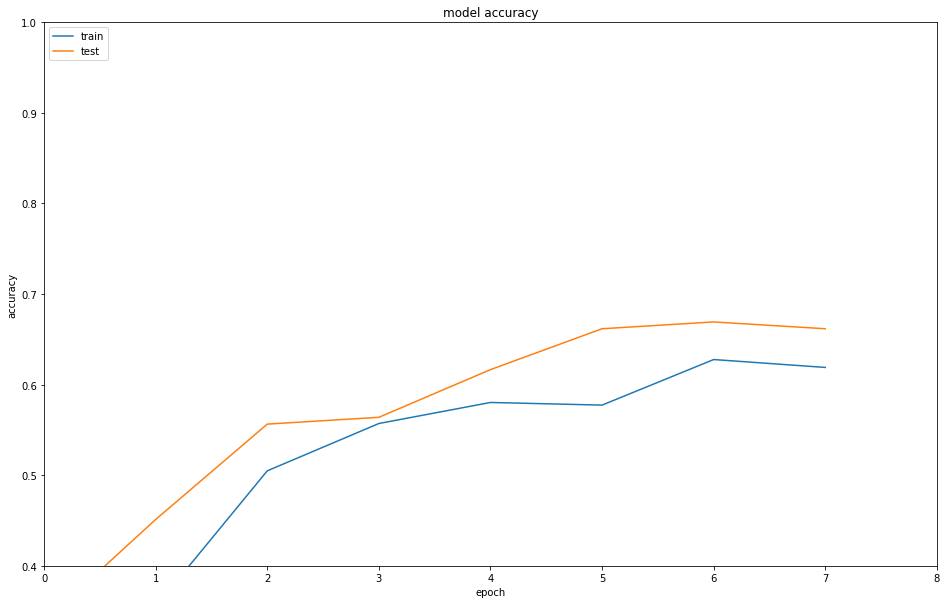

In [32]:
NUM_EPOCHS = 8

history = model.fit(
      train_generator, 
      epochs = NUM_EPOCHS,
      verbose = 1,
      validation_data = validation_generator)

# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0,NUM_EPOCHS])
plt.ylim([0.4,1.0])
plt.show()